<a href="https://colab.research.google.com/github/shravya-9723/IMDB_movieset-analysis-by-python/blob/main/notebookbd3f87ac8b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Ignore warnings


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/sample_data/IMDB-Movie-Data.csv')

# 1. Display Top 23 Rows of The Dataset

In [6]:
data.head(23)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


## 2. Display Last 12 Rows of The Dataset

In [7]:
data.tail(12)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
988,989,Martyrs,Horror,A young woman's quest for revenge against the ...,Pascal Laugier,"Morjana Alaoui, Mylène Jampanoï, Catherine Bég...",2008,99,7.1,63785,NaN,89.0
989,990,Selma,"Biography,Drama,History",A chronicle of Martin Luther King's campaign t...,Ava DuVernay,"David Oyelowo, Carmen Ejogo, Tim Roth, Lorrain...",2014,128,7.5,67637,52.07,NaN
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [8]:
data.shape

(1000, 12)

In [9]:
print('Number of Rows',data.shape[0]) #[0] in tuple indicates number of rows at 0th index
print('Number of Columns',data.shape[1])#[1] in tuple indicates number of columns at 1st index

Number of Rows 1000
Number of Columns 12


## 4. Getting Information About Our Dataset Like Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# 5. Check Null Values In The Dataset

In [14]:
data.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


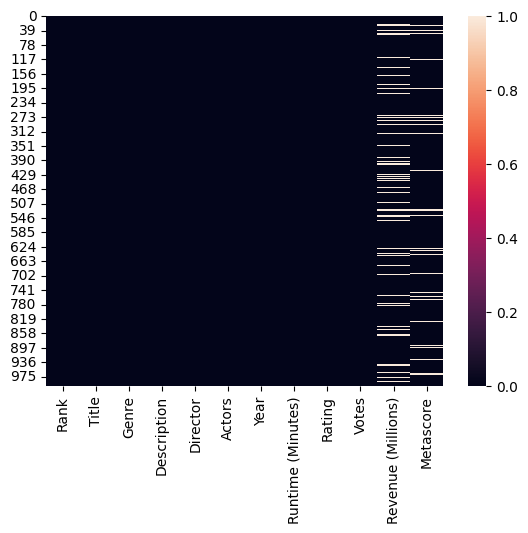

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

# 6. Drop All The Missing Values

In [18]:
data = data.dropna(axis=0)

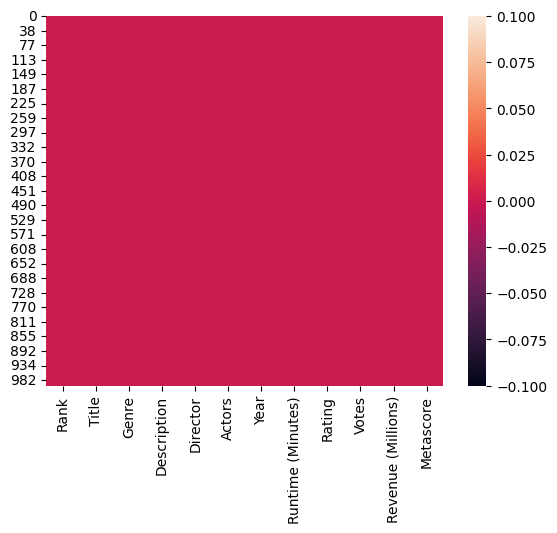

In [17]:
sns.heatmap(data.isnull())
plt.show()

# 7. Check For Duplicate Data

In [20]:
dup_data=data.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

Are there any duplicated values in data? False


# 8. Get Overall Statistics About The DataFrame

In [21]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


## 9. Display the IMDB rating of movies >= 7.3 and Title with highest Rating on top of the Row

In [30]:
data[data['Rating']>=7.3].sort_values(by='Rating', ascending=False)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104,105,The Man from U.N.C.L.E.,"Action,Adventure,Comedy","In the early 1960s, CIA agent Napoleon Solo an...",Guy Ritchie,"Henry Cavill, Armie Hammer, Alicia Vikander, E...",2015,116,7.3,202973,45.43,56.0
78,79,Pirates of the Caribbean: Dead Man's Chest,"Action,Adventure,Fantasy",Jack Sparrow races to recover the heart of Dav...,Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, J...",2006,151,7.3,552027,423.03,53.0
796,797,Rescue Dawn,"Adventure,Biography,Drama",A U.S. fighter pilot's epic struggle of surviv...,Werner Herzog,"Christian Bale, Steve Zahn, Jeremy Davies, Zac...",2006,120,7.3,87887,5.48,77.0
845,846,Flight,"Drama,Thriller",An airline pilot saves almost all his passenge...,Robert Zemeckis,"Denzel Washington, Nadine Velazquez, Don Chead...",2012,138,7.3,276347,93.75,76.0


In [24]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

# 10. In Which Year There Was The Lowest Voting?

In [31]:
data.sort_values(by='Votes',ascending=True).head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
250,251,Bonjour Anne,"Comedy,Drama,Romance",Anne is at a crossroads in her life. Long marr...,Eleanor Coppola,"Diane Lane, Alec Baldwin, Arnaud Viard, Linda ...",2016,92,4.9,178,0.32,50.0


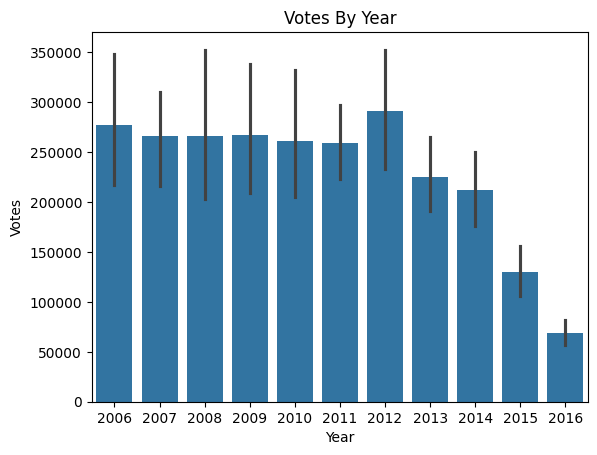

In [32]:
sns.barplot(x='Year',y='Votes',data=data)
plt.title("Votes By Year")
plt.show()
#from the analysis it is evident that year 2016 has significant decrease in votes

# 11. In Which Year There Was The Highest Revenue?

In [35]:
data.sort_values(by='Revenue (Millions)',ascending=False).head(1)
#Star Wars: Episode VII - The Force Awakens has recorded highest revenue with whooping 963.63(millions)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


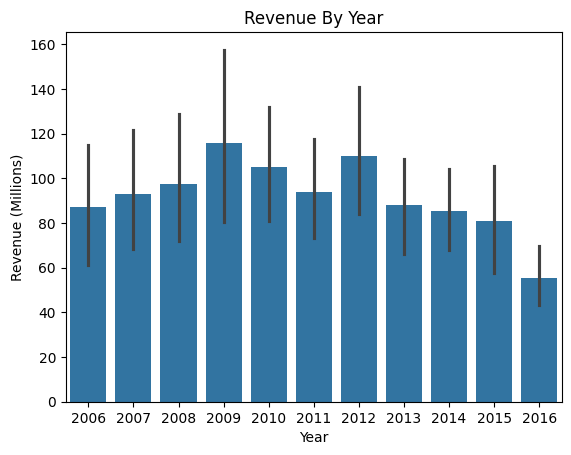

In [36]:
sns.barplot(x='Year',y='Revenue (Millions)',data=data)
plt.title("Revenue By Year")
plt.show()

# 12. Find The Average Rating For Each Director

In [38]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

,Rating
Director,
Christopher Nolan,8.68
Makoto Shinkai,8.60
Olivier Nakache,8.60
Aamir Khan,8.50
Florian Henckel von Donnersmarck,8.50
...,...
Sam Taylor-Johnson,4.10
Joey Curtis,4.00
George Nolfi,3.90


# 13. Display Top 7 Lengthy Movies Title

In [42]:
le =data.nlargest(7,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]. \
set_index('Title')
le

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


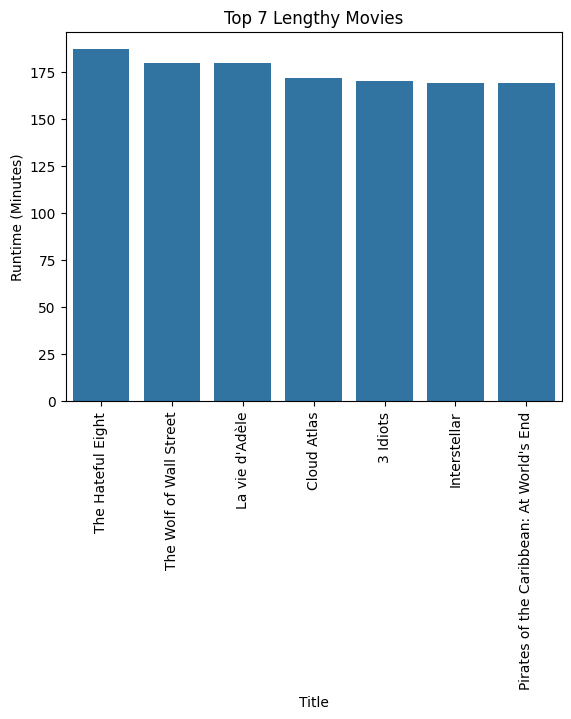

In [45]:
sns.barplot(x=le.index, y=le['Runtime (Minutes)'])
plt.title('Top 7 Lengthy Movies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# 14. Display Number of Movies Per Year

Text(0.5, 1.0, 'Number of Movies Per Year')

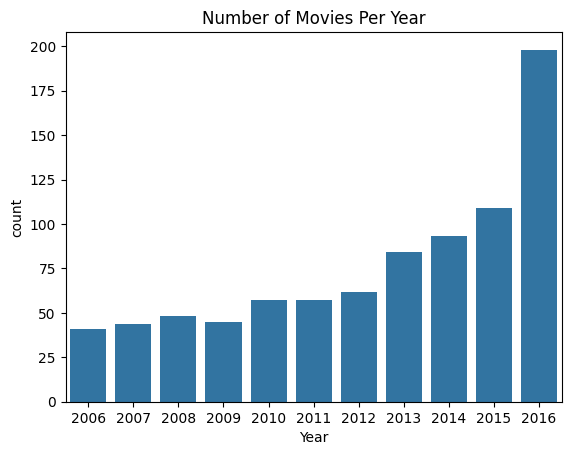

In [46]:
sns.countplot(x='Year',data=data)
plt.title("Number of Movies Per Year")

## 15. Find Most Popular Movie Title (Higest Revenue and Rating)

In [47]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [54]:
# Find the movie with the highest Revenue and Rating
max_revenue = data['Revenue (Millions)'].max()
max_rating_for_max_revenue = data[data['Revenue (Millions)'] == max_revenue]['Rating'].max()

# Filter the DataFrame to find the movie with the highest Revenue and Rating
highest_rated_movie = data[(data['Revenue (Millions)'] == max_revenue) & (data['Rating'] == max_rating_for_max_revenue)]

# Display the Title, Rating, and Revenue (Millions) of the highest-rated movie
print(highest_rated_movie[['Title', 'Rating', 'Revenue (Millions)']])

                                         Title  Rating  Revenue (Millions)
50  Star Wars: Episode VII - The Force Awakens     8.1              936.63


# 16. Display Top 10 Highest Rated Movie Titles And its Directors

In [55]:
top_10=data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')

In [56]:
top_10

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan
Whiplash,8.5,Damien Chazelle


Text(0.5, 1.0, 'Display Top 10 Highest Rated Movie Titles')

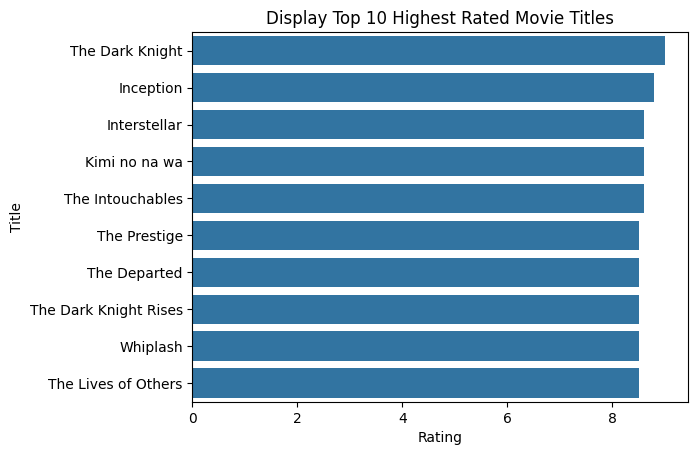

In [60]:
sns.barplot(y=top_10.index, x=top_10['Rating'])
plt.title("Display Top 10 Highest Rated Movie Titles")

# 17. Display Top 10 Action movies before 2013

In [61]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [64]:
# Filter for movies before 2013 and containing 'Action' in the 'Genre' column
ac = data[(data['Year'] <= 2013) & (data['Genre'].str.contains('Action', case=False))].sort_values(by='Year', ascending=True).head(10)
# Display the Title, Genre, and Year
print(ac[['Title', 'Genre', 'Year']].set_index('Title'))  # Set 'Title' as index

                                                                 Genre  Year
Title                                                                       
Pirates of the Caribbean: Dead Man's Chest    Action,Adventure,Fantasy  2006
300                                                 Action,Fantasy,War  2006
Apocalypto                                      Action,Adventure,Drama  2006
Casino Royale                                Action,Adventure,Thriller  2006
The Fast and the Furious: Tokyo Drift            Action,Crime,Thriller  2006
X-Men: The Last Stand                         Action,Adventure,Fantasy  2006
Snakes on a Plane                               Action,Adventure,Crime  2006
Mission: Impossible III                      Action,Adventure,Thriller  2006
Talladega Nights: The Ballad of Ricky Bobby        Action,Comedy,Sport  2006
Superman Returns                               Action,Adventure,Sci-Fi  2006


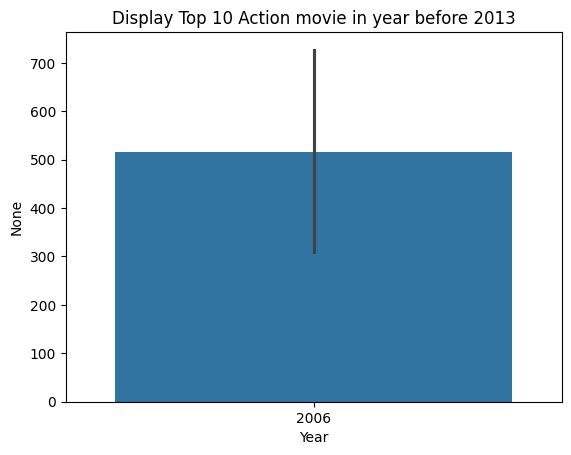

In [65]:
sns.barplot(x=ac['Year'],y=ac.index)
plt.title("Display Top 10 Action movie in year before 2013")
plt.show()

# 18.  Find Average Rating of Movies Year-wise

In [69]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [75]:
data1=data.groupby('Year')[['Year','Rating']].mean().sort_values(by='Rating',ascending=False).set_index('Year')

In [76]:
data1

,Rating
Year,
2006.0,7.143902
2007.0,7.140909
2011.0,6.945614
2012.0,6.933871
2009.0,6.911111
2010.0,6.894737
2013.0,6.832143
2014.0,6.822581
2008.0,6.708333


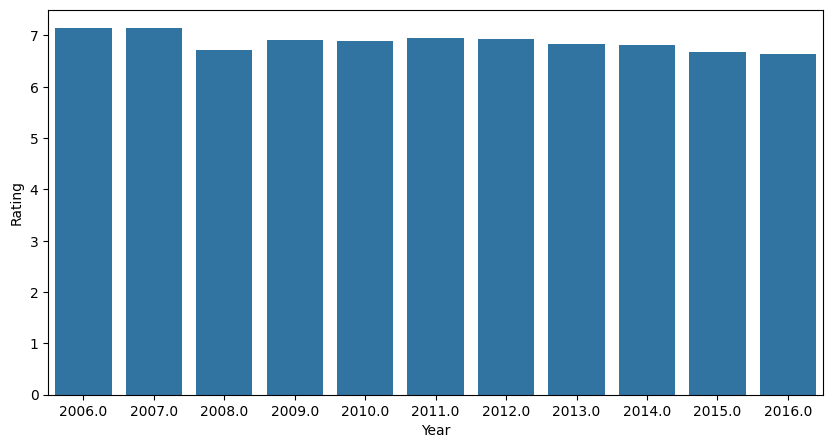

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(x=data1.index,y=data1['Rating'])
plt.show()

# 19. Does Rating Affect The Revenue?

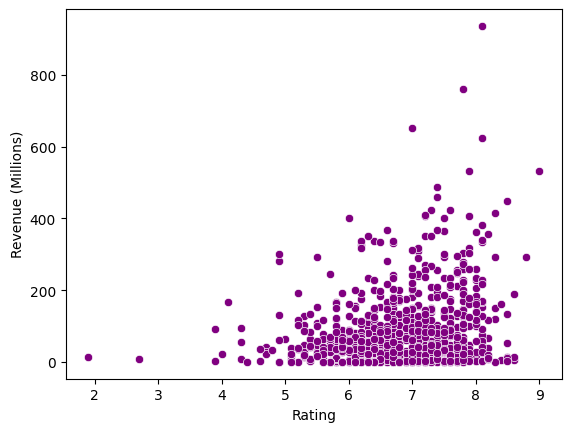

In [81]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=data,color='purple')
plt.show()


# Answer : Yes

# 20. Classify Movies with Highest Rating and Low Revenue


In [83]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [84]:
import numpy as np

# Define a threshold for high rating and low revenue
high_rating_threshold = 7.0  # Adjust as needed
low_revenue_threshold = 50  # Adjust as needed

# Create the 'Result' column based on conditions
data['Result'] = np.where(
    (data['Rating'] >= high_rating_threshold) & (data['Revenue (Millions)'] < low_revenue_threshold),
    'High Rating, Low Revenue',  # Value for movies meeting the condition
    'Other'  # Value for other movies
)

# Display the DataFrame with the new 'Result' column
print(data[['Title', 'Rating', 'Revenue (Millions)', 'Result']])

                        Title  Rating  Revenue (Millions) Result
0     Guardians of the Galaxy     8.1              333.13  Other
1                  Prometheus     7.0              126.46  Other
2                       Split     7.3              138.12  Other
3                        Sing     7.2              270.32  Other
4               Suicide Squad     6.2              325.02  Other
..                        ...     ...                 ...    ...
993  Resident Evil: Afterlife     5.9               60.13  Other
994                 Project X     6.7               54.72  Other
996           Hostel: Part II     5.5               17.54  Other
997    Step Up 2: The Streets     6.2               58.01  Other
999                Nine Lives     5.3               19.64  Other

[838 rows x 4 columns]
